In [29]:
import requests
import numpy as np
import matplotlib.pyplot as plt

HANDLE = 'He110W012LD'
ENDPOINT = 'https://codeforces.com/api/'
METHOD_USER_STATUS = 'user.status?'

def get_submission(start = 1, cnt = 0):
	path = ENDPOINT + METHOD_USER_STATUS + 'handle=' + HANDLE
	if start != 1:
		path += '&from' + str(start)
	if cnt != 0:
		path += '&count=' + str(cnt)
	subs = requests.get(path)
	return subs.json()

json = get_submission()

submissions count : 2348
problem solved count : 1008


(array([356., 115., 121.,  66.,  64.,  43.,  34.,  56.,  55.,  50.,  33.,
          6.,   2.,   3.,   0.,   2.]),
 array([ 800,  900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800,
        1900, 2000, 2100, 2200, 2300, 2400]),
 <BarContainer object of 16 artists>)

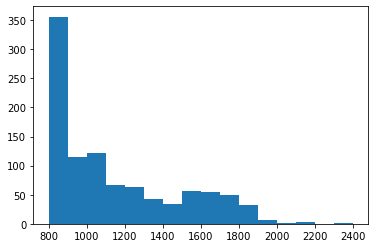

In [48]:
subs = json['result']
print('submissions count : ' + str(len(subs)))

ac = list(filter(lambda s : s['verdict'] == 'OK', subs))
print('problem solved count : ' + str(len(ac)))

prob_rating = []
for prob in ac:
    if 'rating' in prob['problem']:
        rating = prob['problem']['rating']
        prob_rating.append(rating)

data = np.array(prob_rating)
plt.hist(data, bins=range(min(data), max(data) + 100, 100))